# Self-Attention Layer

https://arxiv.org/pdf/1809.04281.pdf

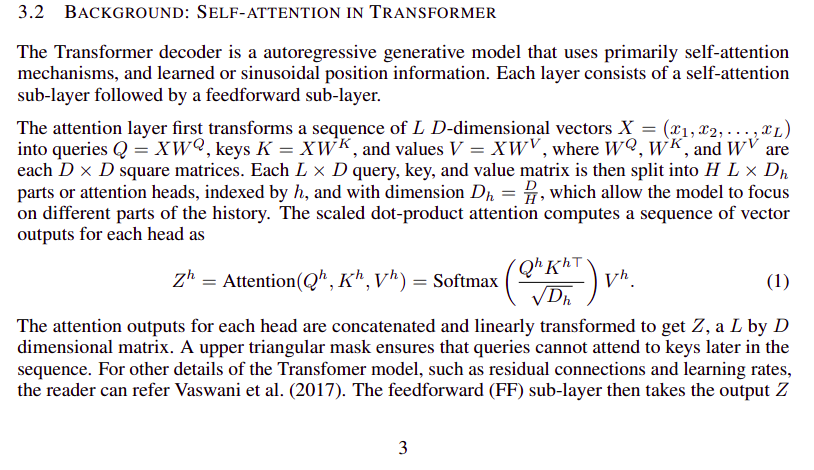

In [79]:
import numpy as np

In [173]:
L = 40
D = 144  # Debe ser divisible por H
X = np.random.rand(L, D) * 2 - 1  # input sequence

In [174]:
X.shape

(40, 144)

In [175]:
WQ = np.random.rand(D, D)  # Query transformation
WK = np.random.rand(D, D)  # Keys transformation
WV = np.random.rand(D, D)  # Values transformation

Q = np.dot(X, WQ)  # Query matrix
K = np.dot(X, WK)  # Key matrix
V = np.dot(X, WV)  # Value matrix

In [176]:
Q.shape

(40, 144)

In [177]:
# Split each matrix into H parts of L x (D/H) dimension
# These parts will be the attention heads

# Example
a = np.array([[1, 2, 3, 4],
              [1, 2, 3, 4]])
np.split(a, 2, axis=1)

[array([[1, 2],
        [1, 2]]),
 array([[3, 4],
        [3, 4]])]

In [178]:
H = 12  # 12 attention heads

Q = np.array(np.split(Q, H, axis=1))  # Q_h = Q[h]
K = np.array(np.split(K, H, axis=1))
V = np.array(np.split(V, H, axis=1))

In [179]:
Q[0].shape

(40, 12)

In [180]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum()

def attention(Q_h, K_h, V_h):
    num = np.dot(Q_h, K_h.T)
    den = (D / H)**0.5
    soft = softmax(num / den)
    result = np.dot(soft, V_h)
    return result

In [181]:
# Z_h = attention(Q_h, K_h, V_h)

Z = np.array([attention(Q[h], K[h], V[h]) for h in range(H)])

In [146]:
# Finally, apply FF Layer to Z

# FF(Z) = ReLU(ZW_1 + b1)W_2 + b_2

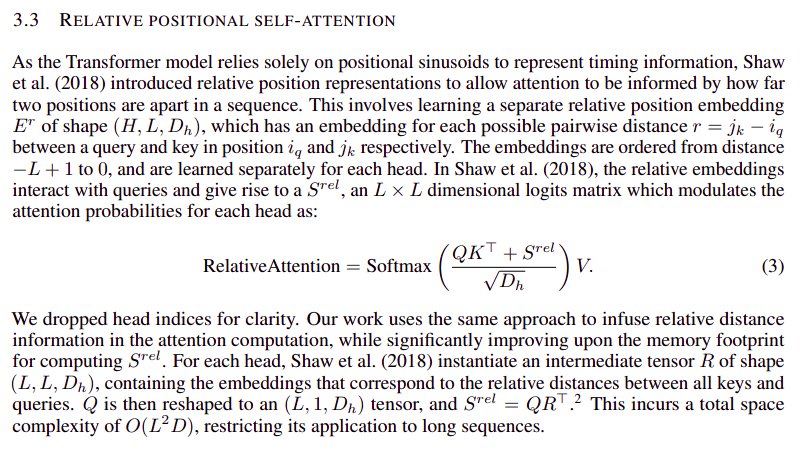

In [157]:
# embedding E_T of shape (H, L, D/H), wich has an embedding for
# each possible pairwaise distance r = j_k - i_q, between a 
# query and a key position i_q and j_k.

# There is one embedding for each head.

def RelativeAttention(Q_h, K_h, V_h, S_rel):
    num = np.dot(Q_h, K_h.T) + S_rel
    den = (D / H)**0.5
    soft = softmax(num / den)
    result = np.dot(soft, V_h)
    return result


In [158]:
S_rel = np.random.rand(L, L)

In [162]:
RelativeAttention(Q[0], K[0], V[0], S_rel).shape

(40, 12)

In [151]:
K[0].T.shape

(12, 40)

In [2]:
import torch
from torch import nn

In [4]:
embedding = nn.Embedding(10, 3)

In [5]:
input_sequences = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
embedding(input_sequences)

tensor([[[-1.0822, -1.0538,  0.3082],
         [-0.5295,  1.7187, -0.7728],
         [ 0.0030, -1.6887,  1.1244],
         [-0.6188, -0.7175,  1.7277]],

        [[ 0.0030, -1.6887,  1.1244],
         [-0.5251,  0.6920,  0.7796],
         [-0.5295,  1.7187, -0.7728],
         [-0.3023,  0.0087, -1.0053]]], grad_fn=<EmbeddingBackward>)